In [23]:
from word_process import WordProcess

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
!pwd

/Users/suraj/research/cyber-bullying/src/notebook


In [54]:
data_path = "../../dataset/1/cyberbullying_tweets.csv"
modified_data_path = "../../dataset/1/modified.csv"

In [27]:
df = pd.read_csv(data_path)

In [28]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [29]:
df.rename(columns={"cyberbullying_type":"status","tweet_text":"text"},inplace=True)
df

,text,status
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [30]:
df['status'].nunique()

6

In [31]:
df['status'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [32]:
# df['status'] = df['status'].map({'gender':"yes", 'religion':"yes", 'other_cyberbullying':"yes",
#        'age':"yes", 'ethnicity':"yes","not_cyberbullying":'no'})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47692 non-null  object
 1   status  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [34]:
# character count
df['text'].apply(len).describe()

count    47692.000000
mean       136.253229
std         85.226899
min          1.000000
25%         78.000000
50%        124.000000
75%        180.000000
max       5018.000000
Name: text, dtype: float64

In [35]:
# word count
df['text'].apply(lambda x: len(x.split())).describe()

count    47692.000000
mean        23.704835
std         15.434881
min          1.000000
25%         13.000000
50%         20.000000
75%         32.000000
max        790.000000
Name: text, dtype: float64

In [36]:
df[['status','text']].groupby('status').count()

,text
status,
age,7992
ethnicity,7961
gender,7973
not_cyberbullying,7945
other_cyberbullying,7823
religion,7998


In [37]:

df.groupby('status')['text'].apply(lambda x: x.str.len().describe())


status                    
age                  count    7992.000000
                     mean      173.542042
                     std        80.052851
                     min        11.000000
                     25%       105.000000
                     50%       171.000000
                     75%       252.000000
                     max      1585.000000
ethnicity            count    7961.000000
                     mean      139.320060
                     std        76.774127
                     min         5.000000
                     25%        88.000000
                     50%       126.000000
                     75%       167.000000
                     max      1869.000000
gender               count    7973.000000
                     mean      136.422300
                     std        71.352681
                     min         2.000000
                     25%        89.000000
                     50%       129.000000
                     75%       147.000000
       

<Axes: xlabel='status', ylabel='count'>

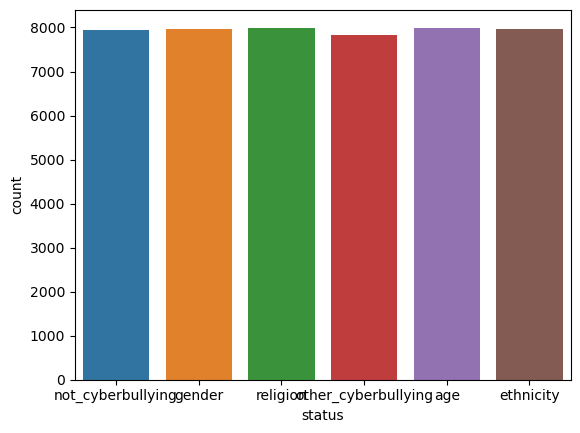

In [38]:
sns.countplot(data=df,x='status')

In [39]:
df['char_len'] = df['text'].apply(len)

In [60]:
df['word_len'] = df['text'].apply(lambda x: len(x.split()))

<Axes: xlabel='char_len'>

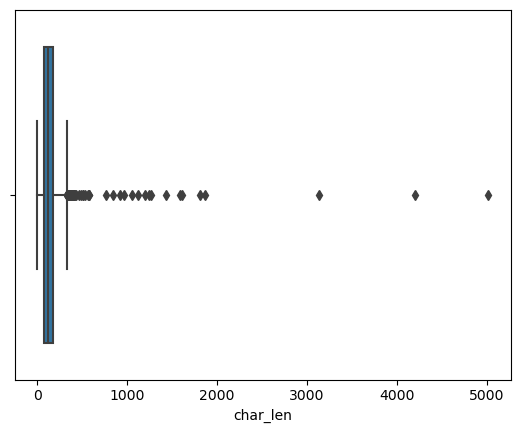

In [40]:
sns.boxplot(data=df,x='char_len')

/Applications/anaconda3/envs/miscEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/miscEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/envs/miscEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/envs/miscEnv/li

<Axes: xlabel='char_len', ylabel='Count'>

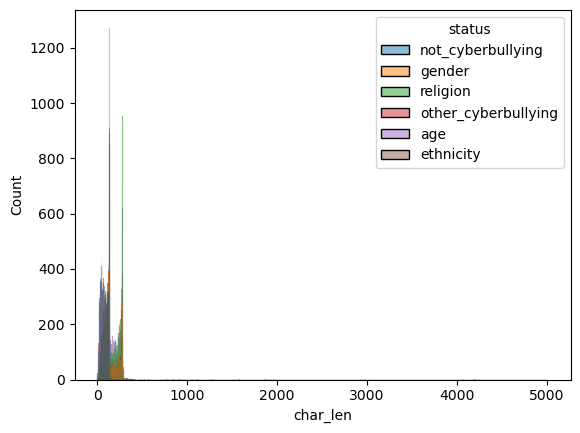

In [41]:
sns.histplot(data=df,x='char_len',hue='status')

In [42]:
tdf = df.loc[df['char_len'] < 300]
tdf.shape, df.shape

((47535, 3), (47692, 3))

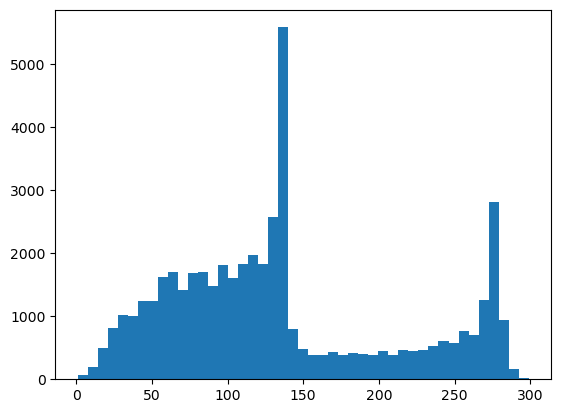

In [43]:
plt.hist(tdf['char_len'],bins=45)
plt.show()

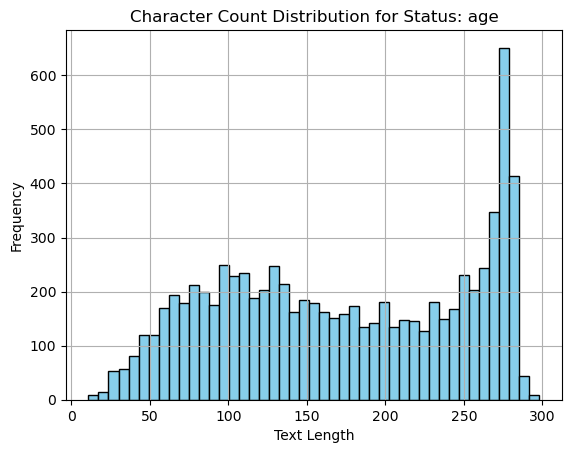

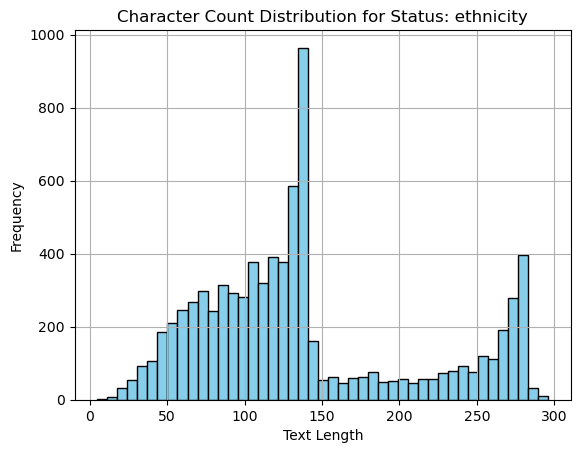

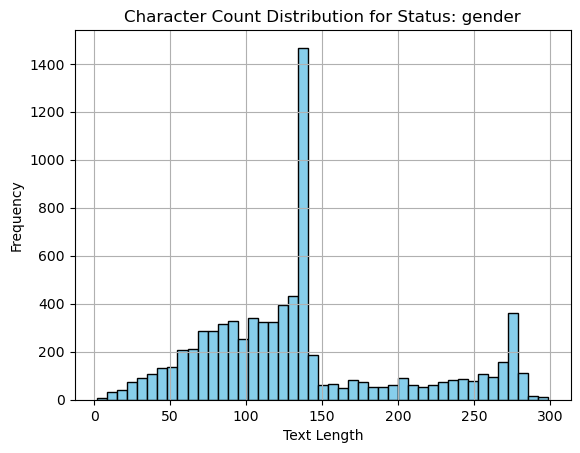

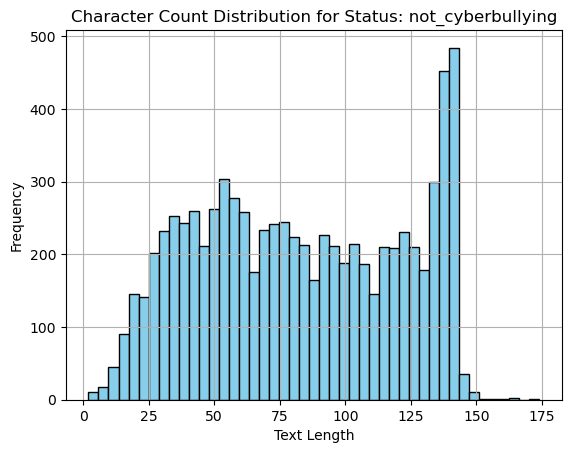

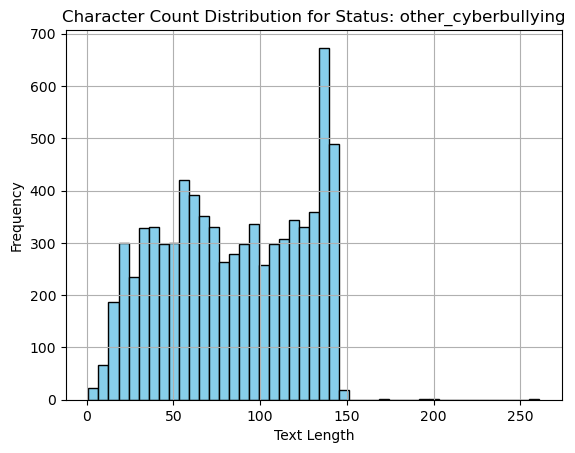

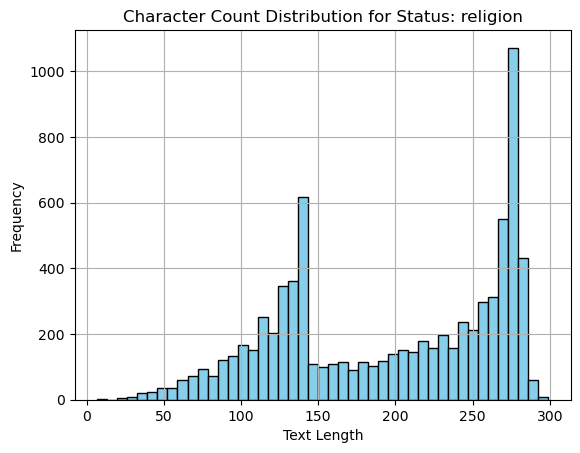

In [44]:
for status, group in tdf.groupby('status'):
    plt.figure()  # Create a new figure
    plt.hist(group['text'].apply(len), bins=45, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(f"Character Count Distribution for Status: {status}")  # Set title
    plt.xlabel('Text Length')  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.grid(True)  # Show grid
    plt.show()  # Show plot


/Applications/anaconda3/envs/miscEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/miscEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/envs/miscEnv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/envs/miscEnv/li

<Axes: xlabel='char_len', ylabel='Count'>

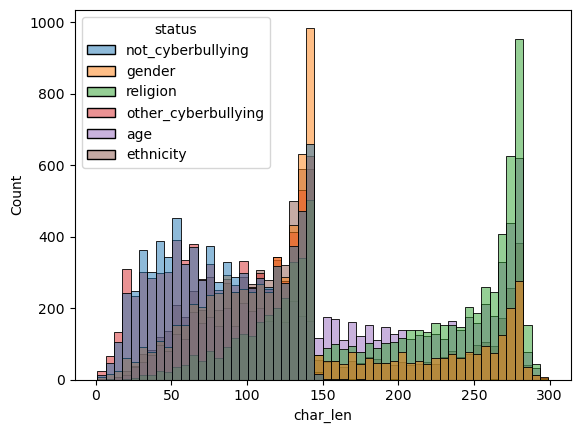

In [45]:
sns.histplot(data=tdf,x='char_len',hue='status')

In [46]:
df.iloc[0]

text        In other words #katandandre, your food was cra...
status                                      not_cyberbullying
char_len                                                   61
Name: 0, dtype: object

In [47]:
df[df['status'] != 'not_cyberbullying'].iloc[3]

text        RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...
status                                                 gender
char_len                                                   66
Name: 7948, dtype: object

In [48]:
wp = WordProcess()

[nltk_data] Downloading package stopwords to /Users/suraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/suraj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/suraj/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [49]:
wp.process_sent2sent(df['text'][0])

'word katandandre food crapilicious mkr'

In [50]:
wp.process_sentence(df['text'][0])

['word', 'katandandre', 'food', 'crapilicious', 'mkr']

In [51]:
df['text_processed'] = df['text'].apply(wp.process_sent2sent)

In [52]:
df.head()

,text,status,char_len,text_processed
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,xochitlsuckkks classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,jason_gio meh thanks head concern another angr...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,rudhoeenglish isi account pretend kurdish acco...


In [53]:
df.iloc[0]

text              In other words #katandandre, your food was cra...
status                                            not_cyberbullying
char_len                                                         61
text_processed               word katandandre food crapilicious mkr
Name: 0, dtype: object

In [61]:
df.to_csv(modified_data_path,index=False)

In [63]:
# pd.read_csv(modified_data_path)